### 세팅

#### 기본 함수

In [ ]:
class model_eval:
    def __init__(self, model=None, X_train=None, y_train=None, X_test=None, y_test=None):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    # 모델 학습
    def model_train(self, cv=None):
        print('X_train.shape :', self.X_train.shape)
        print('y_train.shape :', self.y_train.shape)
        print('X_test.shape :', self.X_test.shape)
        print('y_test.shape :', self.y_test.shape)
        self.model.fit(self.X_train, self.y_train)
        self.pred = self.model.predict(self.X_test)
        self.cm = confusion_matrix(self.y_test, self.pred)
        print('모델 이름:', self.model.__class__.__name__)
        # params_dict = self.model.get_params()  # 딕셔너리 형태의 파라미터 가져오기
        # params_df = pd.DataFrame(list(params_dict.items()), columns=['파라미터', '값'])
        # self.display_scores(params_df, mean=None)
        print('train_Accuracy_score(훈련정확도) :', accuracy_score(self.y_train, self.model.predict(self.X_train)))
        if isinstance(self.model, GridSearchCV):
            self.model.fit(self.X_train, self.y_train)
            print(self.model.best_score_)
            print(self.model.best_params_)
            return self.model
        else:
            if hasattr(self.model, 'predict_proba'):
                self.pred_proba = self.model.predict_proba(self.X_test)[:,1]
                self.model_test(cv)
            else:
                self.pred_proba = None
                self.model_test(cv)
        return self.model


    def print_scores(self, y_test, pred, pred_proba=None):
        from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        cm = confusion_matrix(y_test, pred)
        TN, FP, FN, TP = cm.ravel()
        print('오차행렬 \n', cm)
        print('Accuracy_score(정확도) :', accuracy_score(y_test, pred))
        print('Precision(정밀도) : ', precision_score(y_test, pred))
        print('Recall(재현율) :', recall_score(y_test, pred))
        print('TNR(0을 맞춘 비율) :', TN/(TN+FP))
        print('F1 score :', f1_score(y_test, pred))
        if pred_proba is not None:
            print('Roc Auc score :', roc_auc_score(y_test, pred_proba))

    def model_test(self, cv=None):
        import pandas as pd
        from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        from sklearn.model_selection import cross_validate

        if cv is not None:
            self.cross_validation(cv)
        else:
            self.pred = self.model.predict(self.X_test)
            if hasattr(self.model, 'predict_proba'):
                self.pred_proba = self.model.predict_proba(self.X_test)[:,1]
            else:
                self.pred_proba = None
            self.print_scores(self.y_test, self.pred, self.pred_proba)

    def model_train_1(self, cv=None):
        print('X_train.shape :', self.X_train.shape)
        print('y_train.shape :', self.y_train.shape)
        print('X_test.shape :', self.X_test.shape)
        print('y_test.shape :', self.y_test.shape)
        self.model.fit(self.X_train, self.y_train)
        self.pred = self.model.predict(self.X_test)
        self.cm = confusion_matrix(self.y_test, self.pred)
        print('모델 이름:', self.model.__class__.__name__)
        # params_dict = self.model.get_params()  # 딕셔너리 형태의 파라미터 가져오기
        # params_df = pd.DataFrame(list(params_dict.items()), columns=['파라미터', '값'])
        # self.display_scores(params_df, mean=None)
        print('train_Accuracy_score(훈련정확도) :', accuracy_score(self.y_train, self.model.predict(self.X_train)))
        if isinstance(self.model, GridSearchCV):
            self.model.fit(self.X_train, self.y_train)
            print(self.model.best_score_)
            print(self.model.best_params_)
            return self.model
        else:
            if hasattr(self.model, 'predict_proba'):
                self.pred_proba = self.model.predict_proba(self.X_test)[:,1]
                self.model_test_1(cv)
            else:
                self.pred_proba = None
                self.model_test_1(cv)
        return self.model

    def model_test_1(self, cv=None):
        import pandas as pd
        from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        from sklearn.model_selection import cross_validate

        if cv is not None:
            self.cross_validation(cv)
        else:
            self.pred = self.model.predict(self.X_test)
            if hasattr(self.model, 'predict_proba'):
                self.pred_proba = self.model.predict_proba(self.X_test)[:,1]
            else:
                self.pred_proba = None
            self.print_scores_1(self.y_test, self.pred, self.pred_proba)

    def print_scores_1(self, y_test, pred, pred_proba=None):
        from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        print('Accuracy_score(정확도) :', accuracy_score(y_test, pred))
        print('Precision(정밀도) : ', precision_score(y_test, pred))
        print('Recall(재현율) :', recall_score(y_test, pred))
        print('F1 score :', f1_score(y_test, pred))
        if pred_proba is not None:
            print('Roc Auc score :', roc_auc_score(y_test, pred_proba))


    def cross_validation(self, cv):
        from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
        from sklearn.model_selection import cross_validate
        import pandas as pd
        def TNR(y_true, y_pred):
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            return tn / (tn + fp)

        scoring = {
            'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=cv),
            'recall': make_scorer(recall_score, average=cv),
            'f1': make_scorer(f1_score, average=cv),
            'TNR': make_scorer(TNR)
        }

        if hasattr(self.model, 'predict_proba'):
            scoring['roc_auc'] = make_scorer(roc_auc_score, needs_proba=True)

        scores = cross_validate(self.model, self.X_train, self.y_train, cv=5, scoring=scoring)
        scores_df = pd.DataFrame(scores).round(3)
        scores_df.rename(columns={
            'test_accuracy':'Accuracy',
            'test_precision':'Percision',
            'test_recall':'Recall',
            'test_f1':'F1',
            'test_TNR':'TNR',
            'test_roc_auc':'RocAuc'}, inplace=True)
        self.display_scores(scores_df, mean=True)

    def display_scores(self, df, mean=None):
        import pandas as pd
        def is_ipython():
            try:
                __IPYTHON__
                return True
            except NameError:
                return False

        if is_ipython():
            from IPython.display import display
            display(df)
            if mean is not None:
                print()
                display(df.mean())
        else:
            print(df)
            if mean is not None:
                print()
                print(df.mean())


    def model_visual(self, cm_heatmap='b', roc_auc=False):
        import matplotlib.pyplot as plt
        import seaborn as sns
        import matplotlib as mpl
        from sklearn.metrics import roc_curve, auc

        if cm_heatmap is not None:
            if cm_heatmap=='b':
                new_confusion = [[self.cm[1,1], self.cm[1,0]], [self.cm[0,1], self.cm[0,0]]]

                plt.figure(figsize=(5,5))
                sns.heatmap(new_confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    xticklabels=['1', '0'], yticklabels=['1', '0']);

                plt.ylabel('Acutral label')
                plt.xlabel('Predicted label')

                title = 'Confusion Matrix'
                plt.title(title, size = 15);
                plt.show()

            elif cm_heatmap=='c':
                new_confusion = [[self.cm[1,1], self.cm[0,0]], [self.cm[1,0], self.cm[0,1]]]

                plt.figure(figsize=(5,5))
                sns.heatmap(new_confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    xticklabels=['1', '0'], yticklabels=['Correct', 'Incorrect']);

                plt.ylabel('Correct')
                plt.xlabel('Predicted')

                title = 'Confusion Matrix'
                plt.title(title, size = 15);
                plt.show()


        if roc_auc == True:
            fpr, tpr, thr = roc_curve(self.y_test, self.pred_proba)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            lw = 2  # 라인의 두께 # mediumslateblue indigo
            plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve')
            # plt.fill_between(fpr, tpr, color='mediumslateblue', alpha=0.4)  # hatch와 edgecolor 파라미터 수정
            plt.text(0.8, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)  # AUC 값을 표시하는 부분
            # plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # 무작위 선택에 대한 ROC Curve를 그림
            plt.xlim([0.0, 1.0])  # X축의 범위를 설정
            plt.ylim([0.0, 1.05])  # Y축의 범위를 설정
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic')
            plt.show()
        else:
            pass

    def model_save(self):
        model = self.model
        save_type = input('save type : ')
        if save_type == 'pickle':
            import pickle
            save_path = input('save path+name.pickle: ')
            protocol = input('protocol (default pickle.HIGHEST_PROTOCOL, press enter to use default) : ')
            if protocol == '':
                print('디폴트')
                protocol = pickle.HIGHEST_PROTOCOL
            else:
                print('입력')
                protocol = int(protocol)
            with open(save_path, 'wb') as handle:
                pickle.dump(model, handle, protocol=protocol)
        elif save_type == 'joblib':
            import joblib
            save_path = input('save path+name.joblib :')
            joblib.dump(model, save_path)
        return print(f'{model}을 {save_path}에 저장했습니다.')

    def model_load(self):
        type = input('load type :')
        if type == 'pickle':
            import pickle
            load_path = input('load path+name.pickle :')
            with open(load_path, 'rb') as handle:
                self.model = pickle.load(handle)
        elif type == 'joblib':
            import joblib
            load_path = input('load path+name.joblib :')
            self.model = joblib.load(load_path)
        return self.model, print(f'{self.model}을 {load_path}에서 불러왔습니다.')

    def transformer_save(self, transformer):
        save_type = input('save type :')
        if save_type == 'pickle':
            import pickle
            save_path = input('save path+name.pickle:')
            protocol = input('protocol (default pickle.HIGHEST_PROTOCOL, press enter to use default) : ')
            if protocol == '':
                protocol = pickle.HIGHEST_PROTOCOL
            else:
                protocol = int(protocol)
            with open(save_path, 'wb') as handle:
                pickle.dump(transformer, handle, protocol=protocol)
        elif save_type == 'joblib':
            import joblib
            save_path = input('save path+name.joblib :')
            joblib.dump(transformer, save_path)
        return print(f'{transformer}을 {save_path}에 저장했습니다.')

    def transformer_load(self, transformer):
        type = input('load type :')
        if type == 'pickle':
            import pickle
            load_path = input('load path+name.pickle :')
            with open(load_path, 'rb') as handle:
                trans = pickle.load(handle)
        elif type == 'joblib':
            import joblib
            load_path = input('load path+name.joblib :')
            transformer = joblib.load(load_path)
        return transformer, print(f'{transformer}을 {load_path}에서 불러왔습니다.')

#### 형태소 분석기


In [ ]:
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
g++ set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm
  libnss-mdns fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common l

#### 필요한 라이브러리

In [ ]:
# 기본
import pandas as pd
import numpy as np

# 모델
from sklearn.linear_model import LassoCV, LinearRegression, LogisticRegressionCV, Ridge
from sklearn.svm import SVC, SVR, NuSVC, NuSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor, DaskLGBMRegressor, DaskLGBMClassifier


# 유틸
from sklearn.metrics import make_scorer,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV, ParameterGrid

# 시각화
import matplotlib as plt
import seaborn as sns

#### 파일 로드

In [ ]:
!pip install datasets==1.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.3/306.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.9 MB/s eta 0:00:00


#### 데이터셋 로드

In [ ]:
from datasets import load_dataset
dataset = load_dataset('smilegate-ai/kor_unsmile')

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/290k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/smilegate-ai--kor_unsmile-e0f75c6e3be1af78/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

클론

In [ ]:
!git clone https://github.com/mmopg42/vcvb/
%cd vcvb/data

Cloning into 'vcvb'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 21 (delta 4), reused 21 (delta 4), pack-reused 0
Receiving objects: 100% (21/21), 6.09 MiB | 14.44 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/vcvb/data


### 데이터 전처리

In [ ]:
train = pd.DataFrame(dataset['train'])
test = pd.DataFrame(dataset['valid'])

In [ ]:
display(train.head())

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,labels
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


클린을 기준으로 클린이 1이면 혐오 표현이 없는 데이터, 클린이 0 이면 혐오표현이 있는 데이터.

혐오 표현이 있는 것을 찾을 것이므로 clean이 1인 것을 0으로, 0인 것을 1로 해서 target을 설정

In [ ]:
train['target']=train['clean'].replace((1, 0), ( 0, 1))
test['target'] = test['clean'].replace((1, 0), ( 0, 1))

In [ ]:
X_train = train['문장']
y_train = train['target']

X_test = test['문장']
y_test = test['target']

#### 형태소 분석

In [ ]:
import rhinoMorph
from tqdm import tqdm

rn = rhinoMorph.startRhino()
train_morphed_data=[]
test_morphed_data=[]
data_all = [X_train, X_test]
for idx, val in enumerate(data_all):
    progress_bar = tqdm(total=len(val), desc = 'Train morph' if idx==0 else 'Test morph')
    for sentence in val:
        if idx == 0:
            train_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        elif idx==1:
            test_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        progress_bar.update(1)
    progress_bar.close()

train_X_join = [" ".join(sentence) for sentence in train_morphed_data]
test_X_join = [" ".join(sentence) for sentence in test_morphed_data]


print(train_morphed_data[:2])
print(test_morphed_data[:2])
print(train_X_join[:2])
print(test_X_join[:2])

filepath:  /usr/local/lib/python3.10/dist-packages
classpath:  /usr/local/lib/python3.10/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


Test morph: 100%|██████████| 3737/3737 [00:03<00:00, 1097.68it/s]


[['일안', '시간', '쉬다', '그렇다'], ['아동', '성범죄', '폐', '도버', '기록', '끊어지다', '영원히', '고통', '받다', '무슬림', '푸다', '근친', '떨어지다', '출산', '위험', '다']]
[['ㅇ', 'ㄱ', 'ㄹ', 'ㅇ', '진짜', '죽다', '상관없다', '마인드', '싸우다', '지금', '서열', '상', '타다', '취', '식칼', '들다', '나다', '안', '찌르다', '찌르다', '하다', '애비', '충', '내다', '동', '충', '알다', '아서', '기다', '한번', '서열', '잡다', '그', '담', '길다', '때', '더', '세', '확실', '짓누르다', '있다', '익다'], ['여자', '취미', '애', '낳다', '취미', '좀', '가지다']]
['일안 시간 쉬다 그렇다', '아동 성범죄 폐 도버 기록 끊어지다 영원히 고통 받다 무슬림 푸다 근친 떨어지다 출산 위험 다']
['ㅇ ㄱ ㄹ ㅇ 진짜 죽다 상관없다 마인드 싸우다 지금 서열 상 타다 취 식칼 들다 나다 안 찌르다 찌르다 하다 애비 충 내다 동 충 알다 아서 기다 한번 서열 잡다 그 담 길다 때 더 세 확실 짓누르다 있다 익다', '여자 취미 애 낳다 취미 좀 가지다']


In [ ]:
import rhinoMorph
from tqdm import tqdm

rn = rhinoMorph.startRhino()
train_morphed_data=[]
test_morphed_data=[]
data_all = [X_train, X_test]
for idx, val in enumerate(data_all):

    for sentence in tqdm(val, total=len(val), desc='Train morph' if idx==0 else 'Test morph'):
        if idx == 0:
            train_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        elif idx==1:
            test_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))


train_X_join = [" ".join(sentence) for sentence in train_morphed_data]
test_X_join = [" ".join(sentence) for sentence in test_morphed_data]


print(train_morphed_data[:2])
print(test_morphed_data[:2])
print(train_X_join[:2])
print(test_X_join[:2])

filepath:  /usr/local/lib/python3.10/dist-packages
classpath:  /usr/local/lib/python3.10/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


Test morph: 100%|██████████| 3737/3737 [00:04<00:00, 874.27it/s]

[['일안', '시간', '쉬다', '그렇다'], ['아동', '성범죄', '폐', '도버', '기록', '끊어지다', '영원히', '고통', '받다', '무슬림', '푸다', '근친', '떨어지다', '출산', '위험', '다']]
[['ㅇ', 'ㄱ', 'ㄹ', 'ㅇ', '진짜', '죽다', '상관없다', '마인드', '싸우다', '지금', '서열', '상', '타다', '취', '식칼', '들다', '나다', '안', '찌르다', '찌르다', '하다', '애비', '충', '내다', '동', '충', '알다', '아서', '기다', '한번', '서열', '잡다', '그', '담', '길다', '때', '더', '세', '확실', '짓누르다', '있다', '익다'], ['여자', '취미', '애', '낳다', '취미', '좀', '가지다']]
['일안 시간 쉬다 그렇다', '아동 성범죄 폐 도버 기록 끊어지다 영원히 고통 받다 무슬림 푸다 근친 떨어지다 출산 위험 다']
['ㅇ ㄱ ㄹ ㅇ 진짜 죽다 상관없다 마인드 싸우다 지금 서열 상 타다 취 식칼 들다 나다 안 찌르다 찌르다 하다 애비 충 내다 동 충 알다 아서 기다 한번 서열 잡다 그 담 길다 때 더 세 확실 짓누르다 있다 익다', '여자 취미 애 낳다 취미 좀 가지다']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect_morp = CountVectorizer(max_features=10000).fit(train_X_join)
X_train_final = vect_morp.transform(train_X_join)
X_test_final = vect_morp.transform(test_X_join)
print('X_train:\n', repr(X_train_final))
print('X_test:\n', repr(X_test_final))

X_train:
 <15005x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 113634 stored elements in Compressed Sparse Row format>
X_test:
 <3737x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 26635 stored elements in Compressed Sparse Row format>


#### 모델

##### SVM


In [ ]:
from sklearn.svm import SVC
svm = model_eval(SVC(C=1000, gamma='auto', kernel='rbf'), X_train_final, y_train, X_test_final, y_test)
svm.model_train_1()

X_train.shape : (15002, 10000)
y_train.shape : (15002,)
X_test.shape : (3737, 10000)
y_test.shape : (3737,)
모델 이름: SVC
train_Accuracy_score(훈련정확도) : 0.9014798026929742
Accuracy_score(정확도) : 0.7950227455177951
Precision(정밀도) :  0.8311183144246354
Recall(재현율) : 0.9127803488786045
F1 score : 0.8700373260943332


SVC(C=1000, gamma='auto')

##### XGBoost


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = model_eval(XGBClassifier(n_estimators=100, max_depth=5), X_train_final, y_train, X_test_final, y_test)
xgb.model_train_1()

X_train.shape : (15005, 10000)
y_train.shape : (15005,)
X_test.shape : (3737, 10000)
y_test.shape : (3737,)
모델 이름: XGBClassifier
train_Accuracy_score(훈련정확도) : 0.7672109296901033
Accuracy_score(정확도) : 0.7527428418517528
Precision(정밀도) :  0.7554406964091404
Recall(재현율) : 0.9910778015703069
F1 score : 0.8573633837604199
Roc Auc score : 0.8388465839908087


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### 혼동행렬

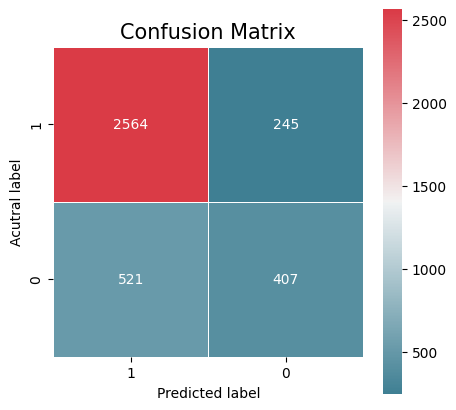

In [ ]:
svm.model_visual(roc_auc=False)

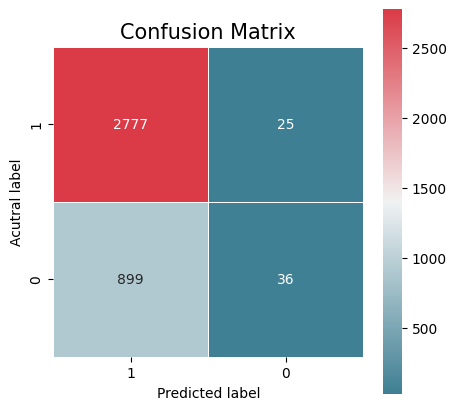

In [ ]:
xgb.model_visual(roc_auc=False)

##### TNR 추가

TNR은 실제 0인 것 중 0으로 예측한 비율

Recall의 반대

In [ ]:
svm.model_test()
print()
xgb.model_test()

오차행렬 
 [[ 444  491]
 [ 270 2532]]
Accuracy_score(정확도) : 0.7963607171527963
Precision(정밀도) :  0.8375785643400595
Recall(재현율) : 0.9036402569593148
TNR(0을 맞춘 비율) : 0.4748663101604278
F1 score : 0.8693562231759657

오차행렬 
 [[  36  899]
 [  25 2777]]
Accuracy_score(정확도) : 0.7527428418517528
Precision(정밀도) :  0.7554406964091404
Recall(재현율) : 0.9910778015703069
TNR(0을 맞춘 비율) : 0.038502673796791446
F1 score : 0.8573633837604199
Roc Auc score : 0.8388465839908087


#### 모델 피드백

예측 결과, 모델이 전부 다 예측을 1로 찍어버리는 결과가 나왔다.

그래서 재현율은 굉장히 높게 나오지만 TNR은 낮게 나오는 문제가 발생.

일단 데이터 분석을 하기로 함

### 데이터 전처리


데이터를 살펴보니 해당 데이터가 인터넷 방송에서의 채팅에는 부적절한 단어들이 있음에도 많은 데이터들이 clean에 속해 있었기에 이를 수정할 필요가 있었다.

또한 클래스 불균형이 존재했다.

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

1    11266
0     3739
Name: target, dtype: int64
1    2802
0     935
Name: target, dtype: int64


아직 불균형이 존재하지만 이를 class_weight를 사용해서 해결해보기로 한다.

In [ ]:
train=pd.read_csv('/content/vcvb/data/스마게 언스마일 train.CSV', encoding='cp949')
test=pd.read_csv('/content/vcvb/data/스마게 언스마일 test.CSV', encoding='cp949')

train['target'] = train['clean'].replace((1, 0), ( 0, 1))
test['target'] = test['clean'].replace((1, 0), ( 0, 1))

X_train = train['문장']
y_train = train['target']
X_test = test['문장']
y_test = test['target']

In [ ]:
import rhinoMorph

rn = rhinoMorph.startRhino()
train_morphed_data=[]
test_morphed_data=[]
data_all = [X_train, X_test]
for idx, val in enumerate(data_all):
    progress_bar = tqdm(total=len(val), desc = 'Train morph' if idx==0 else 'Test morph')
    for sentence in val:
        if idx == 0:
            train_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        elif idx==1:
            test_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        progress_bar.update(1)
    progress_bar.close()

train_X_join = [" ".join(sentence) for sentence in train_morphed_data]
test_X_join = [" ".join(sentence) for sentence in test_morphed_data]

print(train_morphed_data[:2])
print(test_morphed_data[:2])
print(train_X_join[:2])
print(test_X_join[:2])

from sklearn.feature_extraction.text import CountVectorizer
vect_morp = CountVectorizer(max_features=10000).fit(train_X_join)
X_train_final = vect_morp.transform(train_X_join)
X_test_final = vect_morp.transform(test_X_join)

filepath:  /usr/local/lib/python3.10/dist-packages
classpath:  /usr/local/lib/python3.10/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


Test morph: 100%|██████████| 3737/3737 [00:07<00:00, 469.04it/s]


[['일안', '시간', '쉬다', '그렇다'], ['아동', '성범죄', '폐', '도버', '기록', '끊어지다', '영원히', '고통', '받다', '무슬림', '푸다', '근친', '떨어지다', '출산', '위험', '다']]
[['ㅇ', 'ㄱ', 'ㄹ', 'ㅇ', '진짜', '죽다', '상관없다', '마인드', '싸우다', '지금', '서열', '상', '타다', '취', '식칼', '들다', '나다', '안', '찌르다', '찌르다', '하다', '애비', '충', '내다', '동', '충', '알다', '아서', '기다', '한번', '서열', '잡다', '그', '담', '길다', '때', '더', '세', '확실', '짓누르다', '있다', '익다'], ['여자', '취미', '애', '낳다', '취미', '좀', '가지다']]
['일안 시간 쉬다 그렇다', '아동 성범죄 폐 도버 기록 끊어지다 영원히 고통 받다 무슬림 푸다 근친 떨어지다 출산 위험 다']
['ㅇ ㄱ ㄹ ㅇ 진짜 죽다 상관없다 마인드 싸우다 지금 서열 상 타다 취 식칼 들다 나다 안 찌르다 찌르다 하다 애비 충 내다 동 충 알다 아서 기다 한번 서열 잡다 그 담 길다 때 더 세 확실 짓누르다 있다 익다', '여자 취미 애 낳다 취미 좀 가지다']


#### 모델

svm

X_train.shape : (15002, 10000)
y_train.shape : (15002,)
X_test.shape : (3737, 10000)
y_test.shape : (3737,)
모델 이름: SVC
train_Accuracy_score(훈련정확도) : 0.9238768164244767
오차행렬 
 [[ 675  253]
 [ 560 2249]]
Accuracy_score(정확도) : 0.7824458121487824
Precision(정밀도) :  0.898880895283773
Recall(재현율) : 0.8006407974368103
TNR(0을 맞춘 비율) : 0.7273706896551724
F1 score : 0.8469214837130484


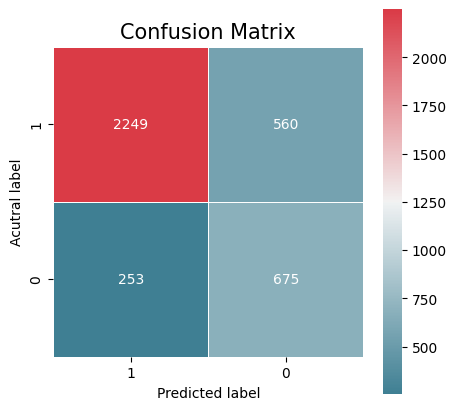

In [ ]:
from sklearn.svm import SVC
e = model_eval(SVC(C=7000, gamma='auto', kernel='rbf', class_weight='balanced'), X_train_final, y_train, X_test_final, y_test)
e.model_train()
e.model_visual()

light gbm

X_train.shape : (15002, 10000)
y_train.shape : (15002,)
X_test.shape : (3737, 10000)
y_test.shape : (3737,)
모델 이름: LGBMClassifier
train_Accuracy_score(훈련정확도) : 0.940874550059992
오차행렬 
 [[ 603  325]
 [ 570 2239]]
Accuracy_score(정확도) : 0.7605030773347605
Precision(정밀도) :  0.8732449297971919
Recall(재현율) : 0.7970808116767533
TNR(0을 맞춘 비율) : 0.6497844827586207
F1 score : 0.8334263912153359
Roc Auc score : 0.811176513914634


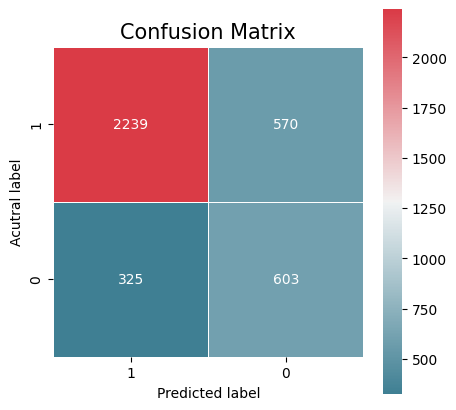

In [ ]:
X_train_final_float = X_train_final.astype('float32')
X_test_final_float = X_test_final.astype('float32')
from lightgbm import LGBMClassifier
lgbm = model_eval(LGBMClassifier(n_estimators=10000, boost_from_average=False, learning_rate=0.1, num_leaves=31, verbose = -1, class_weight='balanced'), X_train_final_float, y_train, X_test_final_float, y_test)
lgbm.model_train()
lgbm.model_visual(roc_auc=False)

#### 모델 피드백

어느 정도 클래스의 불균형이 해소되었지만 정확도가 부족하다고 판단이 되어, target이 0인 데이터를 추가하여 불균형을 해소하기로 결정하였다.

### 데이터 전처리

https://github.com/smilegate-ai/OPELA

해당 데이터를 선정.

해당 데이터는 확인 결과 전부 클린 한 데이터로 판단 되어 데이터 추가에 적합하다고 생각되었다.


In [ ]:
import os

with open('/content/vcvb/data/깨끗한대화35000개.txt', 'r', encoding='cp949') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]

add_data = pd.DataFrame(lines)
add_data['target'] = 0
add_data.rename(columns={0:'문장'}, inplace=True)
add_data

,문장,target
0,"""프로관심러 안녕? 새해 복 많이 받아!! 새해 첫날인데 뭐하면서 시간 보내고 있니?",0
1,난 집콕하면서 개인라디오방송했어,0
2,요즘 새로 생긴 취미거든~ㅎㅎ,0
3,어머니가 볼링 치는 거 좋아하셔? 오와 어머니 운동 좋아하시는구나~~,0
4,오늘은 어떤 하루를 보내고 있니?,0
...,...,...
35674,가격이 역시 꽤 나가네,0
35675,제이드 너랑 대화하는거 신난다 우리 내일 또 만날 수 있을까?,0
35676,그래 ^^,0
35677,난 이만 잘준비 해야겠어,0


In [ ]:
X_train = pd.concat([X_train, add_data['문장'].head(11334-3668)])
y_train = pd.concat([y_train, add_data['target'].head(11334-3668)])

X_test = pd.concat([X_test, add_data['문장'].tail(2809-928)])
y_test = pd.concat([y_test, add_data['target'].tail(2809-928)])

In [ ]:
display(y_train.value_counts())
display(y_test.value_counts())

0    11334
1    11334
Name: target, dtype: int64

1    2809
0    2809
Name: target, dtype: int64

In [ ]:
import rhinoMorph
from tqdm import tqdm

rn = rhinoMorph.startRhino()
train_morphed_data=[]
test_morphed_data=[]
data_all = [X_train, X_test]
for idx, val in enumerate(data_all):
    progress_bar = tqdm(total=len(val), desc = 'Train morph' if idx==0 else 'Test morph')
    for sentence in val:
        if idx == 0:
            train_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        elif idx==1:
            test_morphed_data.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
        progress_bar.update(1)
    progress_bar.close()

print(train_morphed_data[:2])
print(test_morphed_data[:2])
print(train_X_join[:2])
print(test_X_join[:2])

from sklearn.feature_extraction.text import CountVectorizer
vect_morp = CountVectorizer(max_features=10000).fit(train_X_join)
X_train_final = vect_morp.transform(train_X_join)
X_test_final = vect_morp.transform(test_X_join)

filepath:  /usr/local/lib/python3.10/dist-packages
classpath:  /usr/local/lib/python3.10/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


Test morph: 100%|██████████| 5618/5618 [00:03<00:00, 1426.08it/s]


[['일안', '시간', '쉬다', '그렇다'], ['아동', '성범죄', '폐', '도버', '기록', '끊어지다', '영원히', '고통', '받다', '무슬림', '푸다', '근친', '떨어지다', '출산', '위험', '다']]
[['ㅇ', 'ㄱ', 'ㄹ', 'ㅇ', '진짜', '죽다', '상관없다', '마인드', '싸우다', '지금', '서열', '상', '타다', '취', '식칼', '들다', '나다', '안', '찌르다', '찌르다', '하다', '애비', '충', '내다', '동', '충', '알다', '아서', '기다', '한번', '서열', '잡다', '그', '담', '길다', '때', '더', '세', '확실', '짓누르다', '있다', '익다'], ['여자', '취미', '애', '낳다', '취미', '좀', '가지다']]
['일안 시간 쉬다 그렇다', '아동 성범죄 폐 도버 기록 끊어지다 영원히 고통 받다 무슬림 푸다 근친 떨어지다 출산 위험 다']
['ㅇ ㄱ ㄹ ㅇ 진짜 죽다 상관없다 마인드 싸우다 지금 서열 상 타다 취 식칼 들다 나다 안 찌르다 찌르다 하다 애비 충 내다 동 충 알다 아서 기다 한번 서열 잡다 그 담 길다 때 더 세 확실 짓누르다 있다 익다', '여자 취미 애 낳다 취미 좀 가지다']


#### 모델

light gbm

X_train.shape : (22668, 10000)
y_train.shape : (22668,)
X_test.shape : (5618, 10000)
y_test.shape : (5618,)
모델 이름: LGBMClassifier
train_Accuracy_score(훈련정확도) : 0.9657667196047292
오차행렬 
 [[2388  421]
 [ 548 2261]]
Accuracy_score(정확도) : 0.8275186899252402
Precision(정밀도) :  0.843027591349739
Recall(재현율) : 0.8049127803488786
TNR(0을 맞춘 비율) : 0.850124599501602
F1 score : 0.8235294117647058
Roc Auc score : 0.8966713816306002


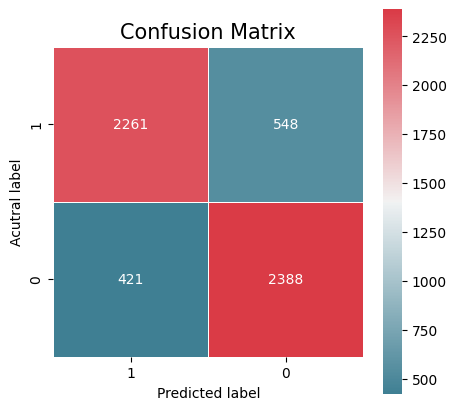

In [ ]:
X_train_final_float = X_train_final.astype('float32')
X_test_final_float = X_test_final.astype('float32')
from lightgbm import LGBMClassifier
lgbm = model_eval(LGBMClassifier(n_estimators=10000, boost_from_average=False, learning_rate=0.1, num_leaves=31, verbose = -1), X_train_final_float, y_train, X_test_final_float, y_test)
lgbm.model_train()
lgbm.model_visual()

svm

X_train.shape : (22668, 10000)
y_train.shape : (22668,)
X_test.shape : (5618, 10000)
y_test.shape : (5618,)
모델 이름: SVC
train_Accuracy_score(훈련정확도) : 0.9533262749250044
오차행렬 
 [[2486  323]
 [ 499 2310]]
Accuracy_score(정확도) : 0.8536845852616589
Precision(정밀도) :  0.8773262438283327
Recall(재현율) : 0.8223567105731577
TNR(0을 맞춘 비율) : 0.8850124599501602
F1 score : 0.8489525909592062


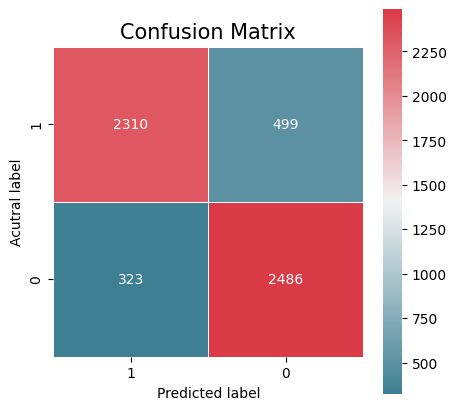

In [ ]:
from sklearn.svm import SVC
svm = model_eval(SVC(C=7350, gamma='auto', kernel='rbf'), X_train_final, y_train, X_test_final, y_test)
svm.model_train()
svm.model_visual()

로지스틱


X_train.shape : (22668, 10000)
y_train.shape : (22668,)
X_test.shape : (5618, 10000)
y_test.shape : (5618,)
모델 이름: LogisticRegressionCV
train_Accuracy_score(훈련정확도) : 0.9479442385742015
오차행렬 
 [[2486  323]
 [ 469 2340]]
Accuracy_score(정확도) : 0.8590245639017444
Precision(정밀도) :  0.8787082238077356
Recall(재현율) : 0.8330366678533286
TNR(0을 맞춘 비율) : 0.8850124599501602
F1 score : 0.8552631578947368
Roc Auc score : 0.9253674142298803


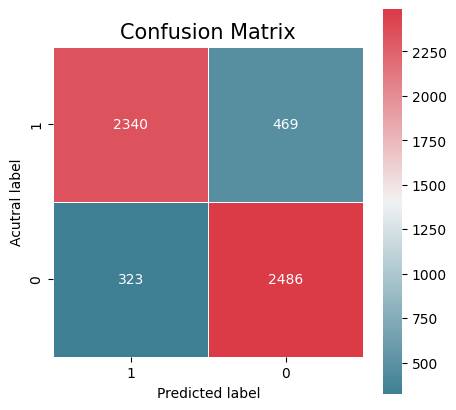

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
Logi = model_eval(LogisticRegressionCV(solver='liblinear', max_iter=10000), X_train_final, y_train, X_test_final, y_test)
Logi.model_train()
Logi.model_visual()

### 모델 테스트 세팅

최상단의 세팅을 실행 했을 경우 실행

In [ ]:
import rhinoMorph
from sklearn.linear_model import LogisticRegressionCV
rn = rhinoMorph.startRhino()

def model_load():
    import pickle
    load_path = '/content/vcvb/data/logistic_model.pickle'
    with open(load_path, 'rb') as handle:
        model = pickle.load(handle)
    return model

def transformer_load():
    import pickle
    load_path = '/content/vcvb/data/vect.pickle'
    with open(load_path, 'rb') as handle:
        trans = pickle.load(handle)
    return trans

model = model_load()
trans = transformer_load()



def model_test(test_data):
    test_data_join = []
    test_data_morp = []
    test_data_morp.append(rhinoMorph.onlyMorph_list(rn, test_data, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
    test_data_join = [" ".join(test_data) for test_data in test_data_morp]
    test = trans.transform(test_data_join)
    pred = model.predict(test)
    if pred == 1:
        print(f'판별 결과 : {pred}')
        print('필터링 되었습니다.')
    else:
        print(f'판별 결과 : {pred}')
        print(test_data)

filepath:  /usr/local/lib/python3.10/dist-packages
classpath:  /usr/local/lib/python3.10/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


### 모델 테스트 세팅

세팅을 실행 안 할시 실행

In [ ]:
!git clone https://github.com/mmopg42/vcvb/
%cd vcvb/data

!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

import rhinoMorph
from sklearn.linear_model import LogisticRegressionCV
rn = rhinoMorph.startRhino()

def model_load():
    import pickle
    load_path = '/content/vcvb/data/logistic_model.pickle'
    with open(load_path, 'rb') as handle:
        model = pickle.load(handle)
    return model

def transformer_load():
    import pickle
    load_path = '/content/vcvb/data/vect.pickle'
    with open(load_path, 'rb') as handle:
        trans = pickle.load(handle)
    return trans

model = model_load()
trans = transformer_load()

def model_test(test_data):

    test_data_join = []
    test_data_morp = []
    test_data_morp.append(rhinoMorph.onlyMorph_list(rn, test_data, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True))
    test_data_join = [" ".join(test_data) for test_data in test_data_morp]
    test = trans.transform(test_data_join)
    pred = model.predict(test)
    if pred == 1:
        print(f'판별 결과 : {pred}')
        print('필터링 되었습니다.')
    else:
        print(f'판별 결과 : {pred}')
        print(test_data)

Cloning into 'vcvb'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 21 (delta 4), reused 21 (delta 4), pack-reused 0
Receiving objects: 100% (21/21), 6.09 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/vcvb/data/vcvb/data
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
openjdk-8-jdk is already the newest version (8u382-ga-1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


### 모델 테스트


In [ ]:
model_test(input('판별할 문장을 넣어주세요:'))

판별할 문장을 넣어주세요:안녕하세요
판별 결과 : [0]
안녕하세요
